In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df=pd.read_excel("./2024_TB_Savingstracker_APAC.xlsm",sheet_name="Savings")
df.columns

Index(['PO/OA number', 'Date', 'No. of requested suppliers',
       'Name of all suppliers \n(seperated with ,)',
       'First non-negotiated offer in local Currency (Net) based on CompanyCode in SAP ',
       'Final negotiated offer in local Currency (Net) based on CompanyCode in SAP',
       'Exchange rate EURO', 'Description of service/material',
       'If available: \nComparable old PO No.', 'Date of old PO',
       'Old PO value\nin local Currency (Net) based on CompanyCode in SAP',
       'Negotiation Method', 'RfQ/eAuction No.',
       ' Single  Source Statement requested and attached in PO?\n',
       'Comment\n', 'Type', 'Deviations\n\n\nRequester's ID', 'Comment',
       'Month', 'Purchasing Group', 'Country', 'Category',
       'Material Group No.', 'Material Group Name', 'System', 'Editor TB',
       'Requisitioner (CWID)', 'Requisitioner\n(first and last name)',
       'First non-negotiated offer in EUR (Net)',
       'Final negotiated offer in EUR (Net)', 'Old PO value\

Raw data explore and preprocessing

In [89]:
df.isnull().sum()

PO/OA number                                                                       2631
Date                                                                               2631
No. of requested suppliers                                                         2632
Name of all suppliers \n(seperated with ,)                                         2631
First non-negotiated offer in local Currency (Net) based on CompanyCode in SAP     2631
Final negotiated offer in local Currency (Net) based on CompanyCode in SAP         2631
Exchange rate EURO                                                                 2645
Description of service/material                                                    2631
If available: \nComparable old PO No.                                              3476
Date of old PO                                                                     3476
Old PO value\nin local Currency (Net) based on CompanyCode in SAP                  3476
Negotiation Method              

In [90]:
df=df.dropna(subset=['Savings (absolute)'])
df.isnull().sum()
df.describe()

,Date,No. of requested suppliers,First non-negotiated offer in local Currency (Net) based on CompanyCode in SAP,Final negotiated offer in local Currency (Net) based on CompanyCode in SAP,Exchange rate EURO,If available: \nComparable old PO No.,Old PO value\nin local Currency (Net) based on CompanyCode in SAP,Month,Material Group No.,First non-negotiated offer in EUR (Net),...,PO Value in Local Currency (Net),No. of chosen supplier,Savings (absolute),Savings (percent),EBITDA (absolute),EBITDA (percent),Intangibles (absolute),Intangibles (percent),Count RfQ,Count eAuction
count,834,833.000000,8.340000e+02,8.340000e+02,834.000000,3.000000e+00,3.000000,834.000000,8.340000e+02,834.000000,...,8.340000e+02,8.340000e+02,834.000000,834.000000,834.000000,3.000000,834.000000,834.000000,834.000000,834.000000
mean,2024-03-25 03:11:39.280575232,1.045618,2.611267e+05,2.497836e+05,0.090934,2.414476e+09,207949.973333,3.293765,3.604886e+07,14491.626159,...,2.577049e+05,8.403434e+06,606.264975,0.034556,9.063956,0.129001,597.201019,0.034008,0.184652,0.002398
min,2024-01-02 00:00:00,1.000000,1.042950e+03,8.760800e+02,0.005919,2.414322e+09,100325.540000,1.000000,1.901010e+07,134.190170,...,8.760800e+02,6.938550e+05,0.000000,0.000000,0.000000,0.059790,0.000000,0.000000,0.000000,0.000000
25%,2024-02-07 00:00:00,1.000000,7.391296e+04,6.976712e+04,0.028512,2.414396e+09,159712.770000,2.000000,2.628561e+07,6693.741384,...,7.039073e+04,7.210029e+06,0.000000,0.000000,0.000000,0.077860,0.000000,0.000000,0.000000,0.000000
50%,2024-03-26 00:00:00,1.000000,1.501832e+05,1.435919e+05,0.127357,2.414471e+09,219100.000000,3.000000,3.604019e+07,10257.757737,...,1.491067e+05,7.708868e+06,75.826483,0.010339,0.000000,0.095930,68.722966,0.010008,0.000000,0.000000
75%,2024-04-30 00:00:00,1.000000,2.971498e+05,2.818707e+05,0.128222,2.414554e+09,261762.190000,4.000000,3.643090e+07,17064.255340,...,2.863688e+05,1.124775e+07,479.600257,0.042972,0.000000,0.163607,469.818651,0.042414,0.000000,0.000000
max,2024-06-24 00:00:00,4.000000,5.159000e+06,4.800000e+06,0.144814,2.414636e+09,304424.380000,6.000000,9.999500e+07,196788.866109,...,4.800000e+06,1.150352e+07,40013.736109,0.750415,4053.553619,0.231283,40013.736109,0.750415,2.000000,1.000000
std,NaN,0.264635,3.715979e+05,3.483222e+05,0.048963,1.572830e+05,102505.250809,1.593439,1.828601e+07,13761.834381,...,3.601562e+05,2.300625e+06,2123.218368,0.067366,178.514424,0.090403,2118.260570,0.066721,0.403412,0.048941


In [91]:
columns_keep=['PO/OA number','First non-negotiated offer in EUR (Net)',
        'No. of requested suppliers', 'Negotiation Method', 'Month', 'Purchasing Group',
       'Material Group No.', 'Name of chosen supplier',
       'Savings (absolute)']
df=df[columns_keep]
df=df.rename(columns={'First non-negotiated offer in EUR (Net)':"First Offer"})
df.describe()

,First Offer,No. of requested suppliers,Month,Material Group No.,Savings (absolute)
count,834.000000,833.000000,834.000000,8.340000e+02,834.000000
mean,14491.626159,1.045618,3.293765,3.604886e+07,606.264975
std,13761.834381,0.264635,1.593439,1.828601e+07,2123.218368
min,134.190170,1.000000,1.000000,1.901010e+07,0.000000
25%,6693.741384,1.000000,2.000000,2.628561e+07,0.000000
50%,10257.757737,1.000000,3.000000,3.604019e+07,75.826483
75%,17064.255340,1.000000,4.000000,3.643090e+07,479.600257
max,196788.866109,4.000000,6.000000,9.999500e+07,40013.736109


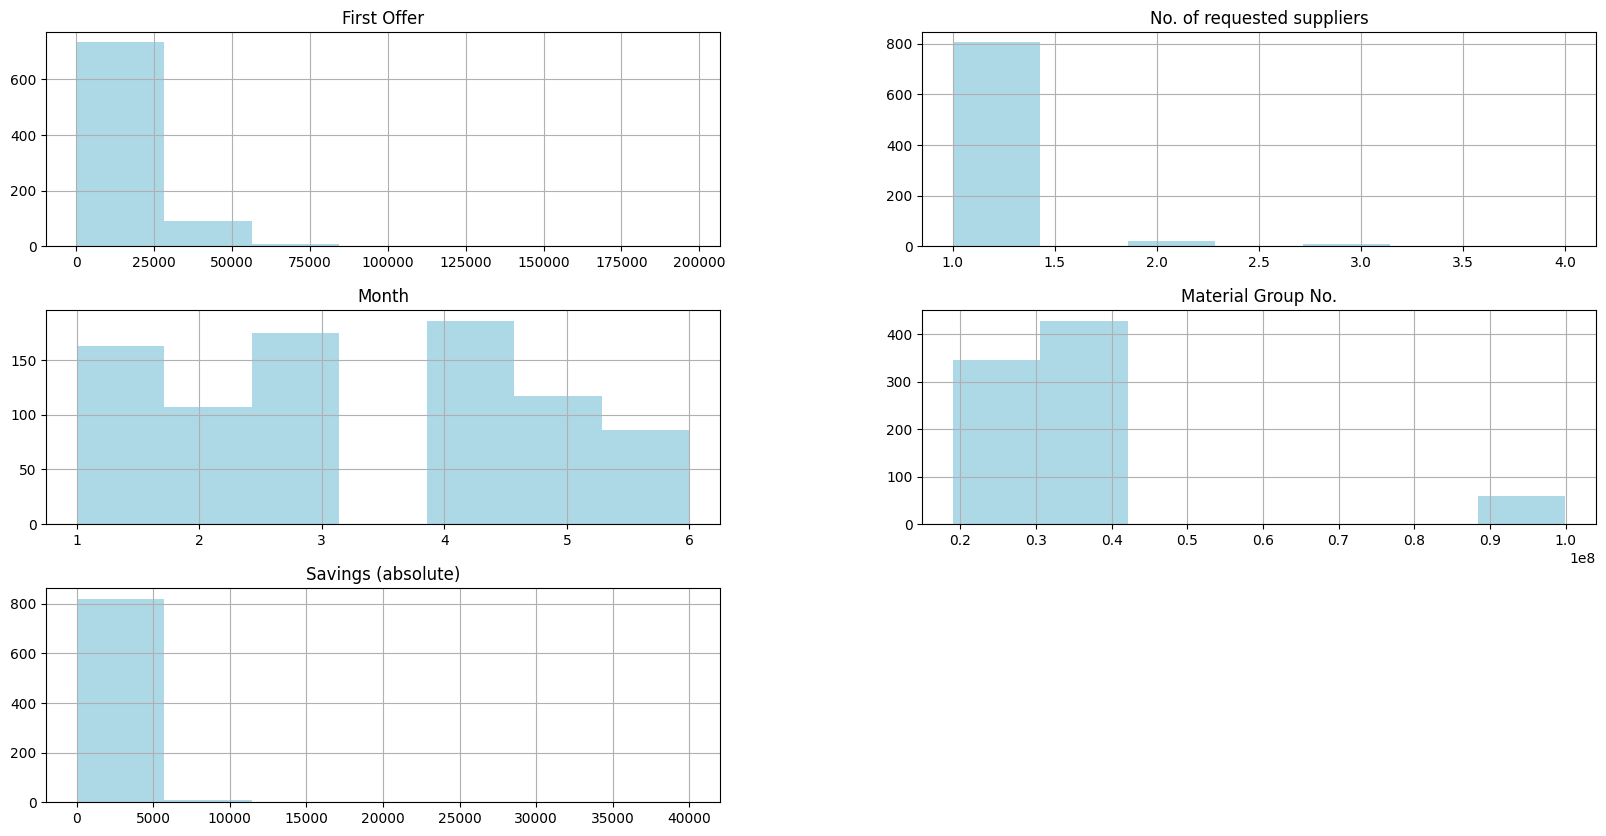

In [92]:
df.hist(figsize=(20,10),bins=7, color='lightblue')
plt.show()

In [93]:
#sns.boxplot(data=df,y='Savings (absolute)')

# df['Savings (absolute)'].hist()
# plt.show()
df['Savings (absolute)'].describe()
s_value=df['Savings (absolute)'].mean()
g_value=df['Savings (absolute)'].quantile(0.75)


In [94]:
def Comp_func(x):
    if x < s_value:
        return "Small"
    elif x< g_value:
        return "Good"
    else:
        return "Exceptional"
    

df['Performance_Score']=df['Savings (absolute)'].map(lambda x:Comp_func(x))
df=df.set_index('PO/OA number')
df=df.drop(columns=['Savings (absolute)'])
df=df.fillna(1)
df.isnull().sum()

First Offer                   0
No. of requested suppliers    0
Negotiation Method            0
Month                         0
Purchasing Group              0
Material Group No.            0
Name of chosen supplier       0
Performance_Score             0
dtype: int64

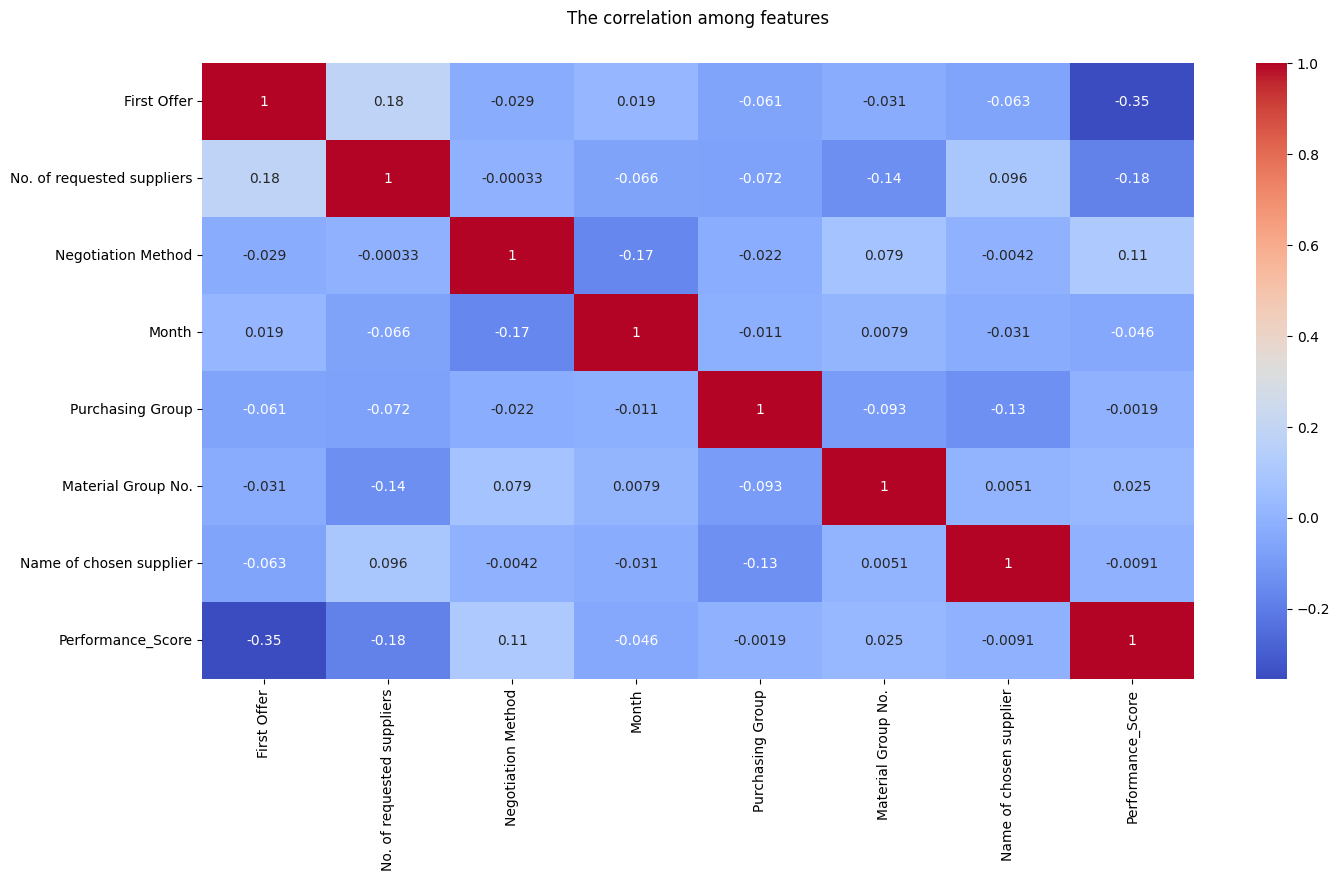

In [95]:
columns = list(df.columns)
categoric_columns=['Negotiation Method','Purchasing Group','Material Group No.','Name of chosen supplier','Performance_Score']
numeric_columns = [col for col in columns if col not in categoric_columns]

from sklearn.preprocessing import LabelEncoder,StandardScaler

label_encoder=LabelEncoder()

df=df.copy()
for column in df[categoric_columns]:
    df[column]=label_encoder.fit_transform(df[column])

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.title('The correlation among features',y= 1.05)
plt.show()

              precision    recall  f1-score   support

           0       0.56      0.15      0.23        34
           1       0.82      0.97      0.89       133

    accuracy                           0.80       167
   macro avg       0.69      0.56      0.56       167
weighted avg       0.76      0.80      0.75       167

First Offer                0.361168
Name of chosen supplier    0.212352
Material Group No.         0.199432
Month                      0.092174
Purchasing Group           0.062631
dtype: float64


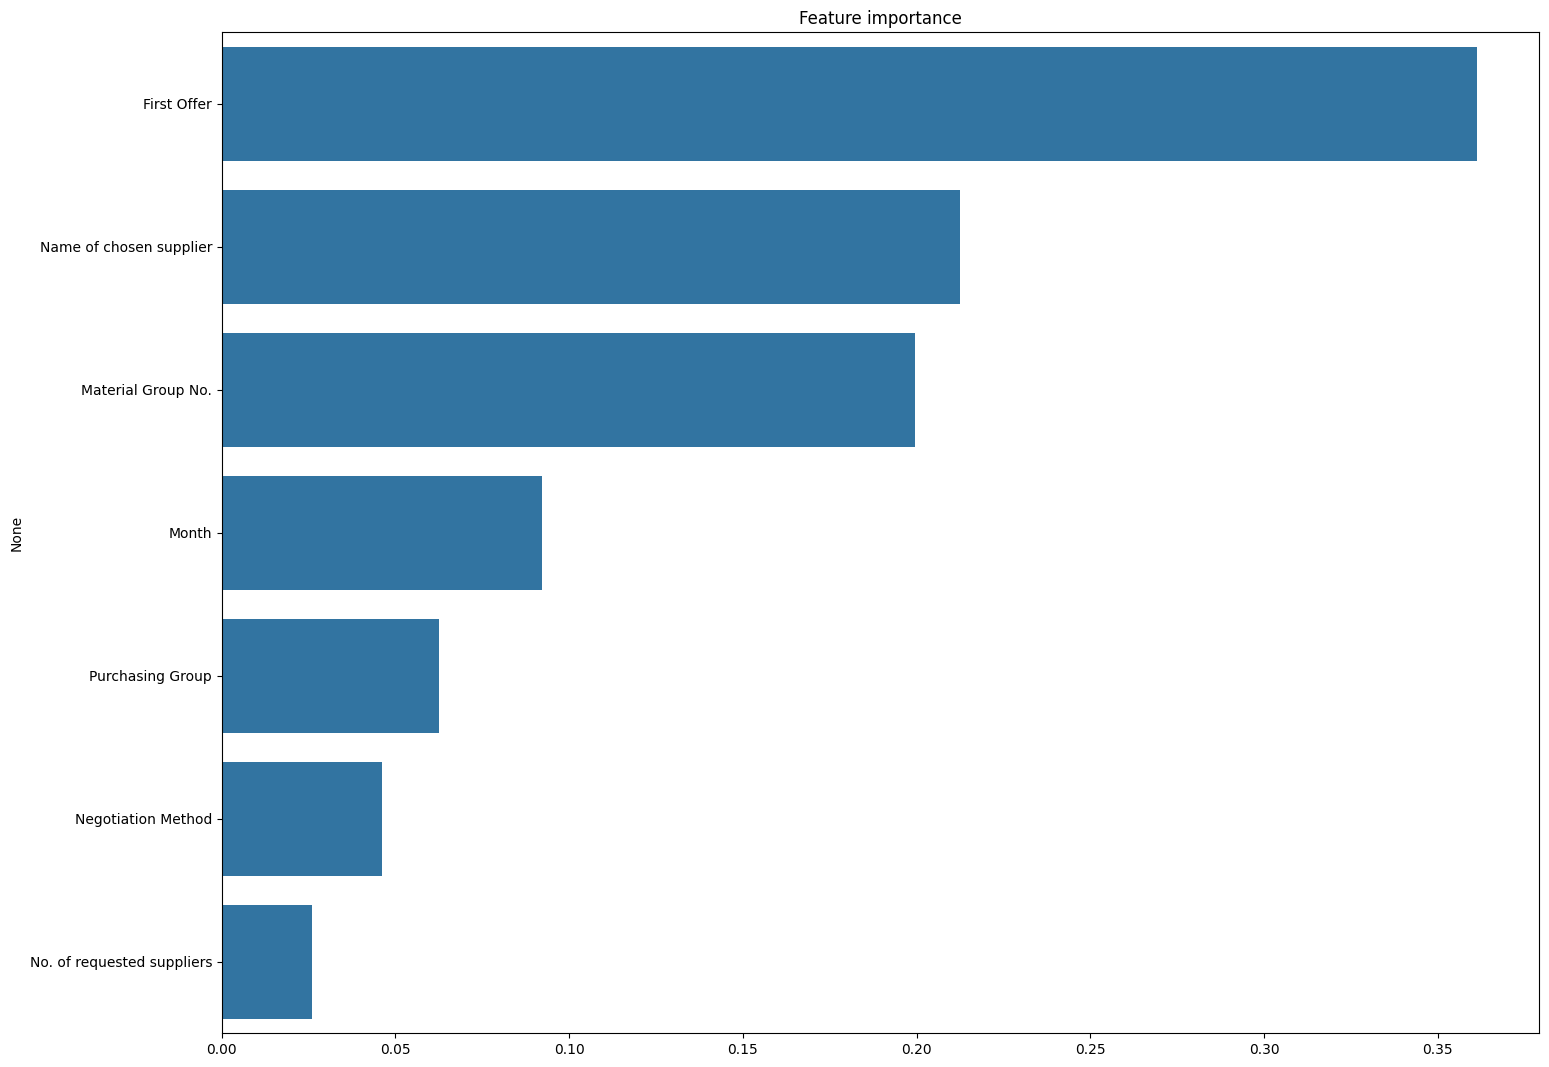

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df.drop(columns=['Performance_Score'])
y = df['Performance_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

clf=RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)

#predict 
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

fimp=pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(fimp.head())
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, orient='h')

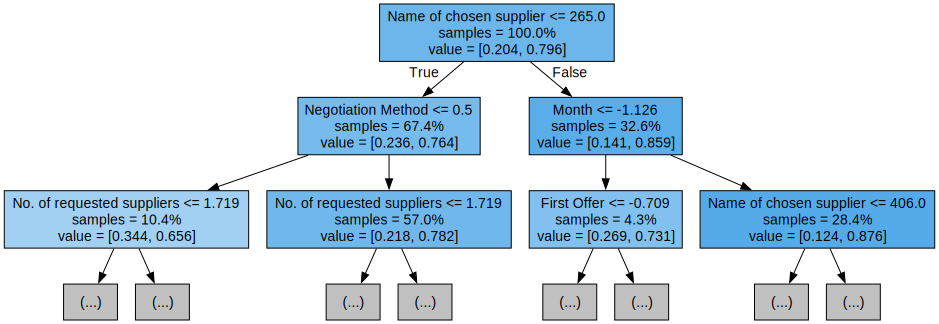

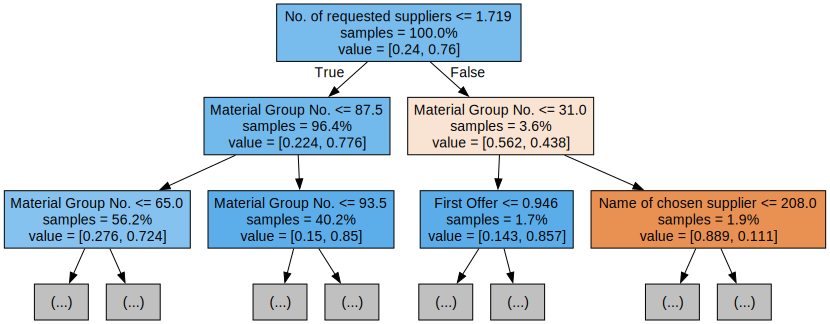

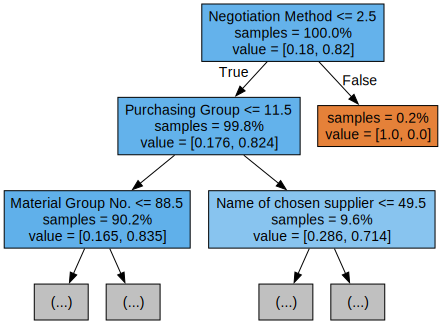

In [97]:
from sklearn.tree import export_graphviz
import graphviz
import os 
current_path = os.environ.get('PATH', '')

# Construct the new PATH
new_path = os.pathsep.join([current_path, r"C:\Users\CVSYX\Graphviz-11.0.0-win64\bin"])

# Update the PATH environment variable
os.environ['PATH'] = new_path

for i in range(3):
    tree=clf.estimators_[i]
    dot_data=export_graphviz(tree,
                            feature_names=X.columns,
                            filled=True,
                            max_depth=2,
                            impurity=False,
                            proportion=True)
    graph=graphviz.Source(dot_data)
    display(graph)



hyperparameter tuning

In [98]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [100,200,300,400,500],
              'max_depth': range(1,10),
              'criterion':['gini','entropy']}
grid = GridSearchCV(estimator = clf,
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5)
grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)



In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import plotly.express as px


classification_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier()}

model_names=[]
accuracies=[]

for name,clf in classification_models.items():
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

df_models=pd.DataFrame({'Model':model_names,'Accuracy':accuracies})
fig = px.bar(df_models, x='Model', y='Accuracy', title='Model Accuracies')
fig.show()

Logistic Regression accuracy: 0.84
K-Nearest Neighbors accuracy: 0.77
Support Vector Machine accuracy: 0.80
Decision Tree accuracy: 0.71
Random Forest accuracy: 0.81
Gradient Boosting accuracy: 0.80
AdaBoost accuracy: 0.81
Gaussian Naive Bayes accuracy: 0.84
XGBoost accuracy: 0.78


In [100]:
best_index=accuracies.index(max(accuracies))
best_model=classification_models[model_names[best_index]]
